In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Marche aléatoire gaussien

In [2]:
epsilon = np.random.standard_normal(60)

In [3]:
path = np.full(60,np.nan)
path[0] = 55
for t in range(1, 60):
    path[t] = path[t - 1] + epsilon[t - 1]

Text(0, 0.5, '$S_t$')

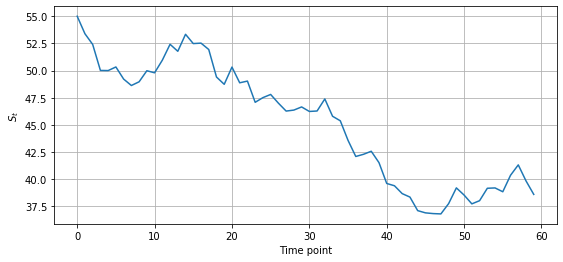

In [4]:
fig, ax = plt.subplots(figsize=(9,4))

plt.plot(path)

plt.grid()

ax.set_xlabel('Time point')

ax.set_ylabel('$S_t$')

# Mouvement brownien

In [5]:
epsilon = np.random.normal(0,np.sqrt(1/10),200-1)

In [6]:
path = np.full(200,np.nan)
path[0] = 0
for t in range(1, 200):
    path[t] = path[t - 1] + epsilon[t - 1]

Text(0, 0.5, '$W_t$')

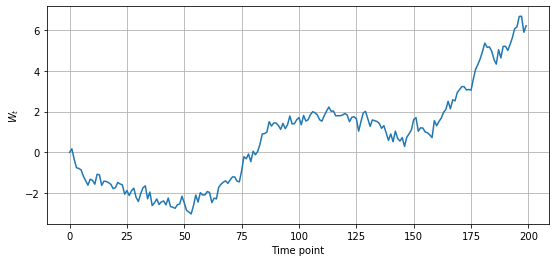

In [7]:
fig, ax = plt.subplots(figsize=(9,4))

plt.plot(path)

plt.grid()

ax.set_xlabel('Time point')

ax.set_ylabel('$W_t$')

## Mouvement brownian géometrique

In [8]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

Paramètres

In [1]:
S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 1
N = 252
deltat = T / N
i = 1000000
discount_factor = np.exp(-r * T)

NameError: name 'np' is not defined

In [10]:
paths = gen_paths(S0, r, sigma, T, N, i)

In [11]:
np.average(paths[-1])

105.11801000447251

Text(0, 0.5, '$S_t$')

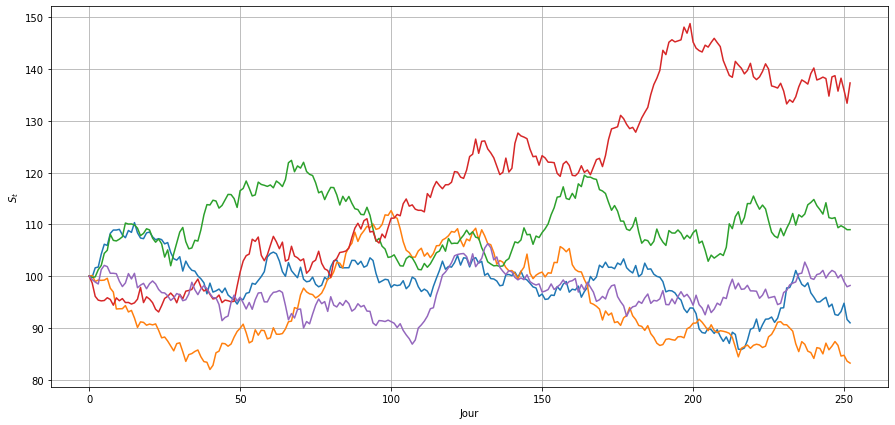

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(paths[:,0:5])
plt.grid()
ax.set_xlabel('Jour')
ax.set_ylabel('$S_t$')

In [13]:
CallPayoffAverage = np.average(np.maximum(0, paths[-1] - K))
CallPayoff = discount_factor * CallPayoffAverage
print(CallPayoff)

10.443884118668786
